Per installare scikit-learn:

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np

## Regressione lineare semplice

### OLS
Basato su indipendenza delle features

In [38]:
x = np.array([[0, 0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept= True)
reg.fit(x,y)

LinearRegression()

In [42]:
reg.coef_[0]  # pendenza retta

0.5

In [43]:
reg.intercept_

1.1102230246251565e-16

In [ ]:
evaluate(reg, (x,y)) # Per calcolo R^2 e RMSE

Si possono anche cercare i Non negative Least Squared, ovvero con coefficienti tutti non negativi, utile in caso  di rappresentazione di alcuni fenomeni fisici o naturali che non possono assumere valori negativi. 

### Ridge regression
Per compensare alcuni problemi degli OLS, imponendo una penalità per la dimensione dei coefficienti

In [21]:
x = np.array([[0, 0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])

In [22]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(x,y)

Ridge(alpha=0.5)

In [23]:
reg.coef_

array([0.44444444, 0.44444444])

In [24]:
reg.intercept_

0.11111111111111116

### Lasso 
Modello lineare che permette la stima di coefficienti sparsi; si può preferire in contesti dove si preferiscono soluzioni con pochissimi o 0 coefficienti con valori non nulli. (il parametro alpha definisce il livello di sparsità dei coefficienti stimati)

In [ ]:
x = np.array([[0, 0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])

In [25]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=.1)
reg.fit(x,y)

Lasso(alpha=0.1)

In [26]:
reg.coef_

array([0.85, 0.  ])

In [27]:
reg.intercept_

0.15000000000000002

### Modelli lineari generalizzati
Modelli di regressione lineare in cui la funzione di perdita è rimpiazzata dalla devianza di una distribuzione particolare (Normale, Poisson, Gamma, inversa della Gaussiana...)

La distribuzione dipende dal parametro di partenza:
- = 0 distribuzione Normale
- = 1 distribuzione di Poisson
- = 2 distribuzione Gamma
- = 3 inversa della distribuzione Gaussiana

In [ ]:
x = np.array([[0, 0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])

In [29]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit(x,y)

TweedieRegressor(alpha=0.5, link='log', power=1)

In [30]:
reg.coef_

array([0.38885627, 0.38885627])

In [31]:
reg.intercept_

-0.9699690512672052

## Regressione con SVM (Support Vector Machines)
Si chiama anche SVR, o Support Vector Regression.

Ci sono tre tipi possibili, come per la classificazione delle SVM:
- SVR: considera solo il kernel lineare;
- LinearSVR: fornisce un'implementazione più rapida;
- NuSVR: formulazione diversa dalle precedenti. 

In [32]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

In [33]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X, y)

SVR()

In [34]:
regr.predict([[1, 1]])

array([1.5])

## Decision Tree e Random Forest

### Regressione con Decision Tree

In [46]:
from sklearn import tree

In [47]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

In [48]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [49]:
clf.predict([[1, 1]])

array([0.5])

### Regressione con Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)

In [52]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

RandomForestRegressor(n_estimators=200)

## Classificazione binaria (con metriche)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

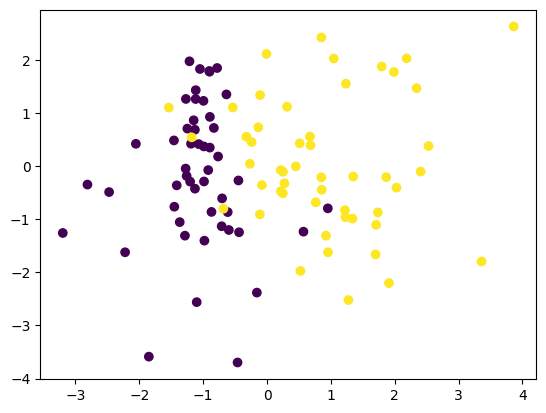

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [5]:
def plot_decision_boundary(model, X, Y): # visualizzare il decision boundary
    
    h = .02 

    x_min, x_max = X[:, 0].min()-.1, X[:, 0].max()+.1
    y_min, y_max = X[:, 1].min()-.1, X[:, 1].max()+.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white')
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white')

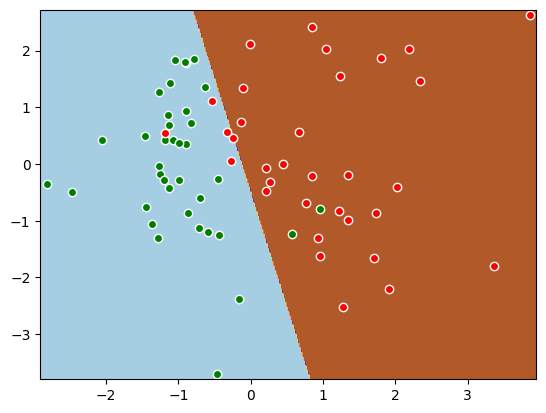

In [6]:
plot_decision_boundary(lr, X_train, y_train)

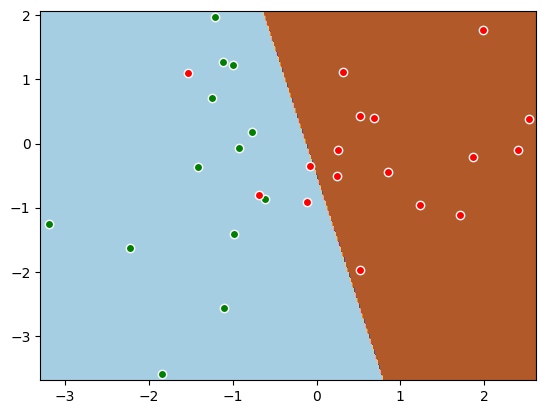

In [9]:
plot_decision_boundary(lr, X_test, y_test)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [12]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test = lr.predict_proba(X_test)

In [13]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision=True, show_recall=True):

  cm = confusion_matrix(y_true, y_pred) # tn, fp, fn, tp 

  df_cm = pd.DataFrame(cm, index = labels,
                    columns = ["Predicted "+labels[0],"Predicted "+labels[1]])
  sns.heatmap(df_cm, annot=True)

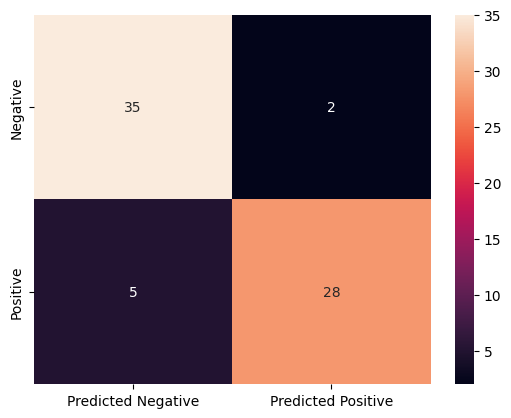

In [14]:
plot_confusion_matrix(y_train, y_pred_train)

In [15]:
def classification_report(y_true, y_pred):
  print(f"PRECISION: {precision_score(y_true, y_pred)}")
  print(f"RECALL: {recall_score(y_true, y_pred)}")
  print(f"F1: {f1_score(y_true, y_pred)}")
  print(f"ACCURACY: {accuracy_score(y_true, y_pred)}")

print("TRAIN REPORT")
classification_report(y_train, y_pred_train) # con l'argomento digits definiamo la precisione
print("\nTEST REPORT")
classification_report(y_test, y_pred_test)

TRAIN REPORT
PRECISION: 0.9333333333333333
RECALL: 0.8484848484848485
F1: 0.888888888888889
ACCURACY: 0.9

TEST REPORT
PRECISION: 1.0
RECALL: 0.7647058823529411
F1: 0.8666666666666666
ACCURACY: 0.8666666666666667


In [16]:
from sklearn.metrics import classification_report

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train)) # con l'argomento digits definiamo la precisione
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.93      0.85      0.89        33

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70

TEST REPORT
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.76      0.87        17

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30



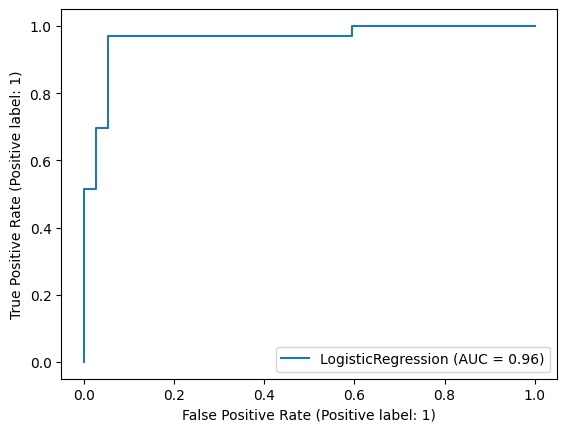

In [18]:
RocCurveDisplay.from_estimator(lr, X_train, y_train)

## Classificazione multiclasse

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [20]:
X, y = make_classification(n_samples=100, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, n_classes=3, random_state = 0)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [22]:
lr = LogisticRegression(multi_class="ovr") # si può anche fare con multi_class = "multinomial"
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [23]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.76      0.52      0.62        25
           2       0.65      0.77      0.71        22

    accuracy                           0.73        70
   macro avg       0.73      0.74      0.72        70
weighted avg       0.73      0.73      0.72        70

TEST REPORT
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.50      0.29      0.36         7
           2       0.54      0.64      0.58        11

    accuracy                           0.60        30
   macro avg       0.58      0.56      0.56        30
weighted avg       0.59      0.60      0.59        30



In [24]:
y_proba_train = lr.predict_proba(X_train)
roc_auc_score(y_train, y_proba_train, multi_class="ovo", average="macro")

0.8791436100131752

In [25]:
y_proba_test = lr.predict_proba(X_test)
roc_auc_score(y_test, y_proba_test, multi_class="ovo", average="macro")

0.7323232323232323